## Data analysis over employee retention in a company

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
emp=pd.read_csv('hr_employee_churn_data.csv')

In [4]:
emp

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,low,1
14995,14996,0.37,0.48,2,160,3,0,0,low,1
14996,14997,0.37,0.53,2,143,3,0,0,low,1
14997,14998,0.11,0.96,6,280,4,0,0,low,1


In [5]:
emp.columns

Index(['empid', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

In [6]:
emp.shape

(14999, 10)

In [7]:
emp.duplicated().sum()
#there are no duplicates in our dataset

0

In [8]:
emp.info()
#we can observe that out of 14999 rows only two rows are having null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [9]:
emp[emp.isnull().any(axis=1)]
#these are the rows that have null values

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
5,6,NaN,0.50,2,153,3,0,0,low,1
15,16,NaN,0.54,2,143,3,0,0,low,1


In [10]:
mean= emp['satisfaction_level'].mean()
mean
#as only two records of satisfaction_level are having null values we are going to fill it with mean value of that column

0.6128625725145028

In [11]:
emp=emp.fillna({'satisfaction_level':mean})

In [12]:
emp.loc[5]
# here we can see that the null value of satisfaction_level is filled with mean 0.612..

empid                           6
satisfaction_level       0.612863
last_evaluation               0.5
number_project                  2
average_montly_hours          153
time_spend_company              3
Work_accident                   0
promotion_last_5years           0
salary                        low
left                            1
Name: 5, dtype: object

In [13]:
emp.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248618,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


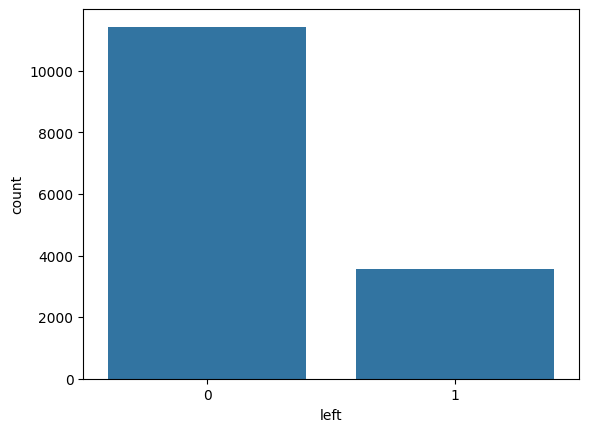

In [33]:
sns.countplot(x='left',data=emp)
plt.show()

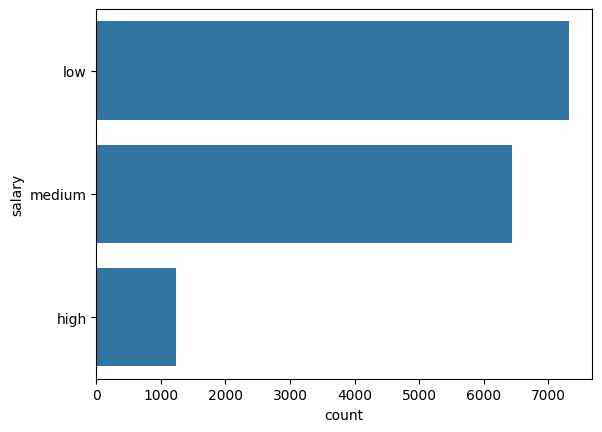

In [25]:
sns.countplot(emp['salary'])
plt.show()
#we can see that most of the employees are having low salary

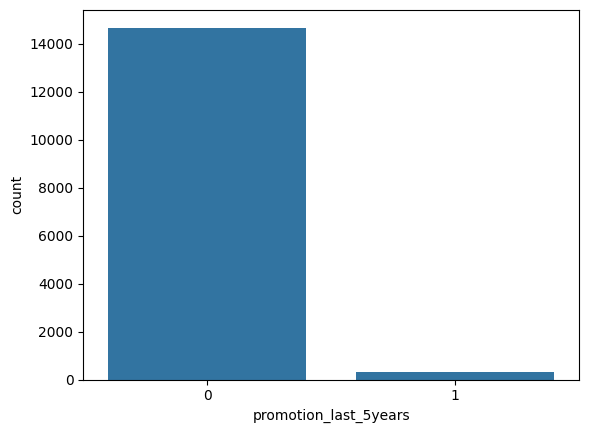

In [29]:
sns.countplot(x='promotion_last_5years',data=emp)
plt.show()
#It becomes clear that nearly more than 90% of the employees didn't have promotions since last 5 years.

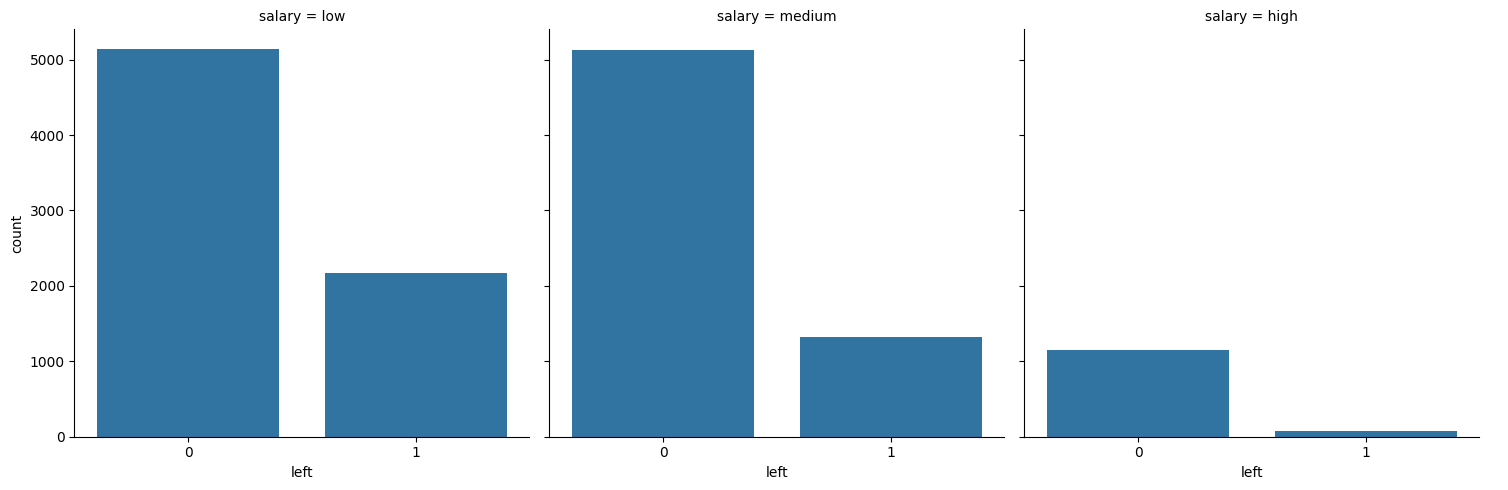

<Figure size 2000x1000 with 0 Axes>

In [20]:
sns.catplot(x='left',col='salary',kind='count',data=emp)
plt.figure(figsize=(20,10))
plt.show()

#It is evident that rate of employee retention is more for employees with low salaraies

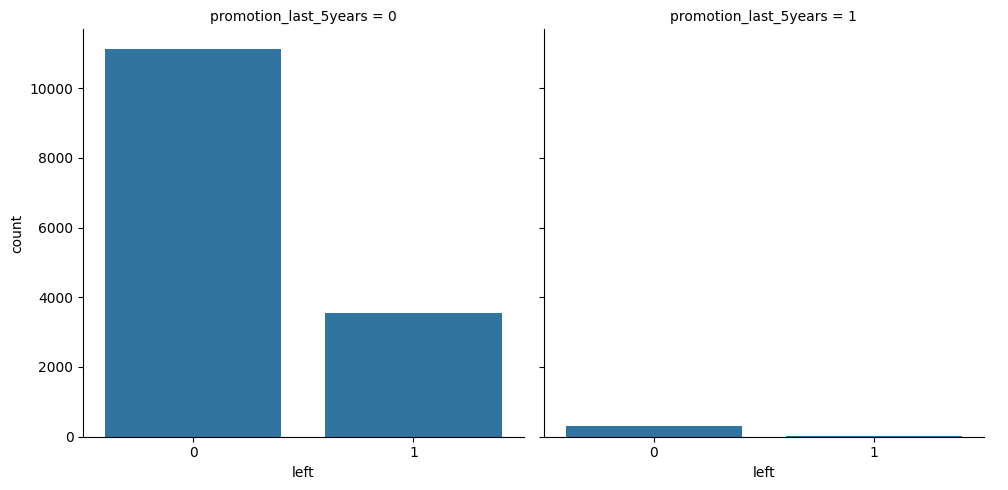

<Figure size 2000x1000 with 0 Axes>

In [16]:
sns.catplot(x='left',col='promotion_last_5years',kind='count',data=emp)
plt.figure(figsize=(20,10))
plt.show()

#It is evident that rate of employee retention is more for employees who do not have promotion since last five years.

In [18]:
emp2=emp.copy()
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
emp2['salary']=lab.fit_transform(emp['salary'])

In [21]:
mat_corr=emp2.corr()

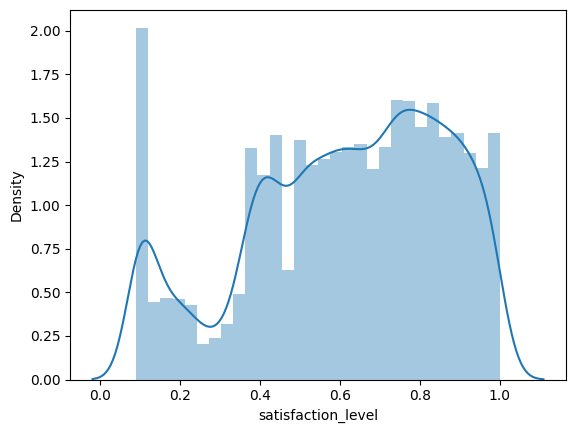

In [27]:
sns.distplot(emp['satisfaction_level'])
plt.show()

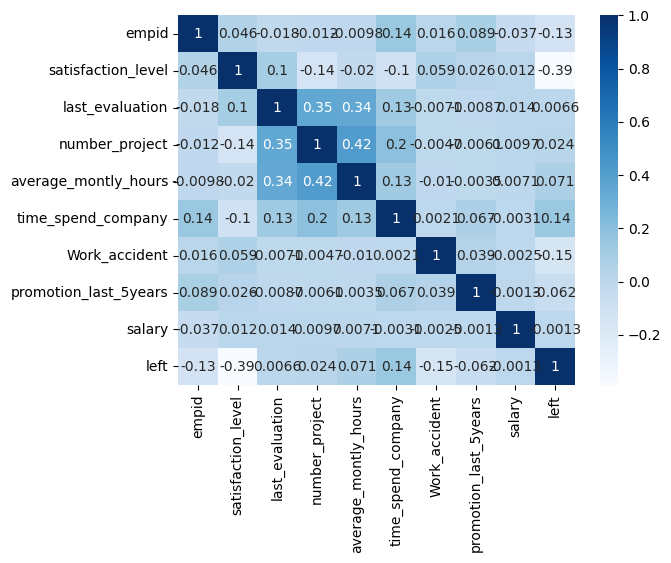

In [23]:
sns.heatmap(mat_corr,annot=True,cmap='Blues')
plt.show()

#Is is apparent that satisfaction_level and rate of retention is having negative correlaion